<b>Dataset Import</b>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/pierrezurbito/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


<b>Dataset Shape</b>

In [2]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

print(df.shape)
df.head(10)
#df.dropna()
#df.drop_duplicates()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()
mode_age = df['Age'].mode()

median_fare= df['Fare'].median()
mean_fare = df['Fare'].mean()
mode_fare = df['Fare'].mode()

print(df['Survived'].count())

print(mean_age, median_age, mode_age)
print(mean_fare, median_fare, mode_fare)


891
29.69911764705882 28.0 0    24.0
Name: Age, dtype: float64
32.204207968574636 14.4542 0    8.05
Name: Fare, dtype: float64


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isnull().sum()

np.int64(0)

In [9]:
survival_count = df["Survived"].astype(str).eq('1').sum()
print("Number of survivors: ", survival_count)

ave_survival_age = df["Age"].mean()
print("The average age of everyone in the ship is: ", int(ave_survival_age))




Number of survivors:  342
The average age of everyone in the ship is:  29


<b>Count of Passenger by Gender</b>

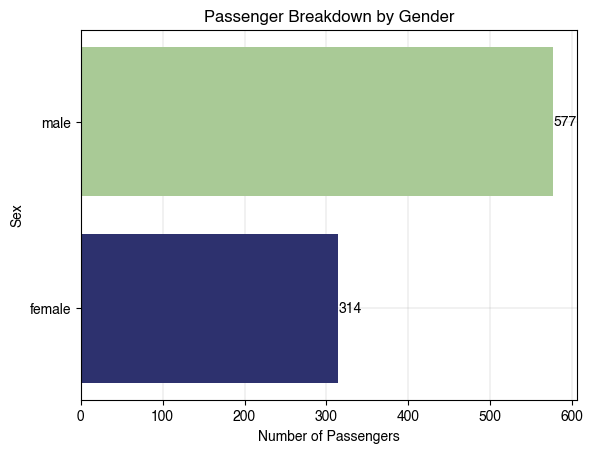

In [84]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Helvetica'
sex = df["Sex"].value_counts().sort_index()
fig, ax = plt.subplots(1,1)

colors = ['#2d316e', '#a9ca96', '#679f91']
x = sex.index
y = sex.values

bars = plt.barh(x, y, color = colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{width:.0f}',
             ha='left', va='center', fontsize=10)

ax.set_axisbelow(True)
plt.grid(linewidth = 0.25)

plt.xlabel('Number of Passengers')
plt.xticks()
plt.ylabel('Sex')
plt.title("Passenger Breakdown by Gender")

plt.show()




In [11]:
correlation = df['Fare'].corr(df['Survived'])
print(correlation)


0.25730652238496243


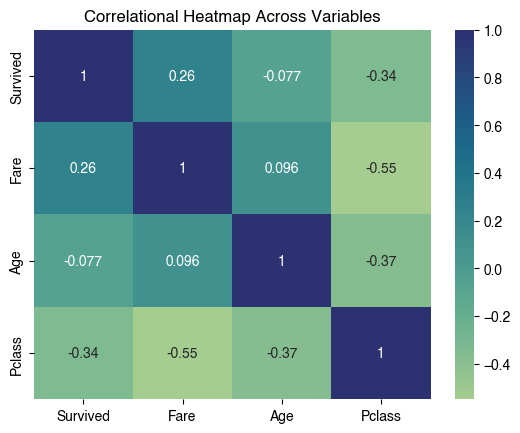

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

array= ['Survived', 'Fare', 'Age', 'Pclass']
correlation_matrix = df[array].corr(method='pearson')

plt.rcParams['font.family'] = 'Helvetica'
plt.title('Correlational Heatmap Across Variables')
sns.heatmap(correlation_matrix, cmap='crest', annot=True)
plt.show()


Text(0, 0.5, '')

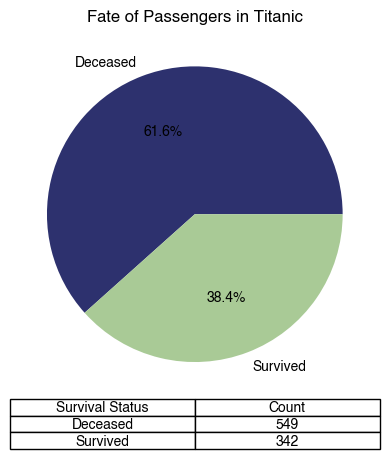

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Helvetica'
survival_counts = df['Survived'].value_counts().sort_index()
survival_counts.plot(kind = 'pie', labels = ['Deceased', 'Survived'], autopct = '%1.1f%%', colors = colors)
plt.title('Fate of Passengers in Titanic')
table_data = [
    ['Deceased', survival_counts[0]],
    ['Survived', survival_counts[1]]
]

table = plt.table(
    cellText = table_data,
    colLabels= ['Survival Status', 'Count'],
    cellLoc='center',
    loc='bottom',
    
)
plt.ylabel('')






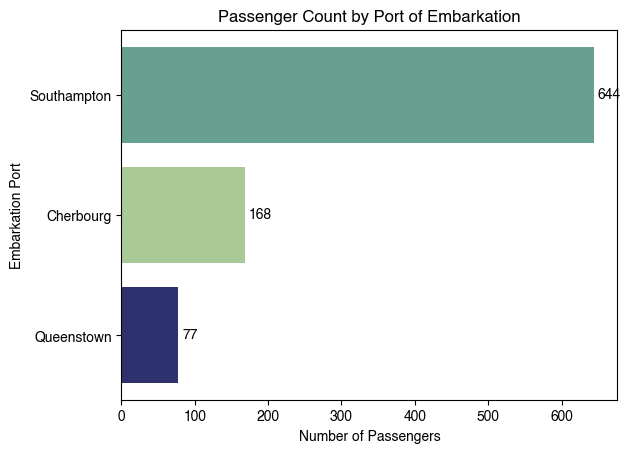

In [ ]:
import matplotlib.pyplot as plt

# Set global font
plt.rcParams['font.family'] = 'Helvetica'

# Data
embark_count = df['Embarked'].value_counts(ascending=True)
embark_count = embark_count.rename(index={'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Create the plot
fig, ax = plt.subplots()

# Horizontal bar chart
bars = ax.barh(embark_count.index, embark_count.values, color = colors)

# Add value labels beside each bar
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}',            # Value text
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(3, 0),               # Offset (x, y)
                textcoords="offset points",
                ha='left', va='center', fontsize=10)

#Titles and Labels
ax.set_title('Passenger Count by Port of Embarkation')
ax.set_xlabel('Number of Passengers')
ax.set_ylabel('Embarkation Port')

# Show the plot
plt.show()
